In [1]:
#from notebooks.library.display import toggle_input_code
#toggle_input_code()

The real and imaginary parts of the complex conductivity $\sigma = \sigma_1 - j \sigma_2$ are given by
\begin{align*}
\frac{\sigma_1}{\sigma_n}
  &=
  \frac{2}{h \nu}
  \int_\Delta^\infty \mathrm{d} E
  \frac{[f(E) - f(E + h \nu)] (E^2 + \Delta^2 + h \nu E)}
  {(E^2 - \Delta^2)^{1/2} [(E + h \nu)^2 - \Delta^2]^{1/2}} \\
  &\quad+
  \frac{1}{h \nu}
  \int_{\Delta - h \nu}^{-\Delta} \mathrm{d} E
  \frac{[1 - 2 f(E + h \nu)] (E^2 + \Delta^2 + h \nu E)}
  {(E^2 - \Delta^2)^{1/2} [(E + h \nu)^2 - \Delta^2]^{1/2}}
\end{align*}
and
\begin{align*}
\frac{\sigma_2}{\sigma_n}
  &=
  \frac{1}{h \nu}
  \int_{\Delta - h \nu, -\Delta}^{\Delta} \mathrm{d} E
  \frac{[1 - 2 f(E + h \nu)] (E^2 + \Delta^2 + h \nu E)}
  {(\Delta^2 - E^2)^{1/2} [(E + h \nu)^2 - \Delta^2]^{1/2}},
\end{align*}
where the lower limit of the second integral is always at least $-\Delta$.

Rewrite the energies in units of the gap, using $x = \frac{E}{\Delta}$ and $y = \frac{h \nu}{\Delta}$:
\begin{align*}
\frac{\sigma_1}{\sigma_n}
  &=
  \frac{2}{y}
  \int_1^\infty \mathrm{d} x
  \frac{[\eta(x) - \eta(x + y)] (x^2 + x y + 1)}
  {(x^2 - 1)^{1/2} [(x + y)^2 - 1]^{1/2}} \\
  &+
  \frac{1}{y}
  \int_{1 - y}^{-1} \mathrm{d} x
  \frac{[1 - 2 \eta(x + y)] (x^2 + x y + 1)}
  {(x^2 - 1)^{1/2} [(x + y)^2 - 1]^{1/2}}
\end{align*}
and
\begin{align*}
\frac{\sigma_2}{\sigma_n}
  &=
  \frac{1}{y}
  \int_{1 - y, -1}^{1} \mathrm{d} x
  \frac{[1 - 2 \eta(x + y)] (x^2 + x y + 1)}
  {(1 - x^2)^{1/2} [(x + y)^2 - 1]^{1/2}},
\end{align*}
where $\eta(z) = f(\Delta z)$ is the occupancy.

In these units the two cases separate at $y = 2$, where the photon energy equals the spectroscopic gap.

For $y \lt 2$, the second integral contributing to $\sigma_1$ is not present, and the lower limit of the $\sigma_2$ integral is $1 - y \gt -1$.

For $y \gt 2$, the lower limit of the second $\sigma_1$ integral is $1 - y \lt -1$, and the lower limit of the $\sigma_2$ integral is $-1$.

M-B say that the signs of the square roots are such that the weighting function
\begin{equation*}
g(E)
  =
  \frac{E^2 + \Delta^2 + h \nu E}
  {(E^2 - \Delta^2)^{1/2} [(E + h \nu)^2 - \Delta^2]^{1/2}}
  \gt 0.
\end{equation*}
This is equivalent to
\begin{equation*}
\frac{(x^2 + x y + 1)}
  {(x^2 - 1)^{1/2} [(x + y)^2 - 1]^{1/2}}
  \gt 0.
\end{equation*}

To do:
- figure out limits of integrals
- plot weight and thermal occupancy together

In [2]:
def g(x, y):
    return ((x**2 + x * y + 1) /
            (np.abs(x**2 - 1)**(1/2) * np.abs((x + y)**2 - 1)**(1/2)))

In [3]:
def weight(x, y):
    return ((x**2 + x * y + 1) /
            ((x**2 - 1)**(1/2) * ((x + y)**2 - 1)**(1/2)))

In [4]:
yy = [0.001, 0.01, 0.1, 1, 2, 10]
x1 = np.linspace(1, 1e1, 1e3)
x2 = np.linspace(-1, 1, 1e3)
x3 = np.linspace(-5, -1, 1e3);

-c:3: RuntimeWarning: divide by zero encountered in true_divide


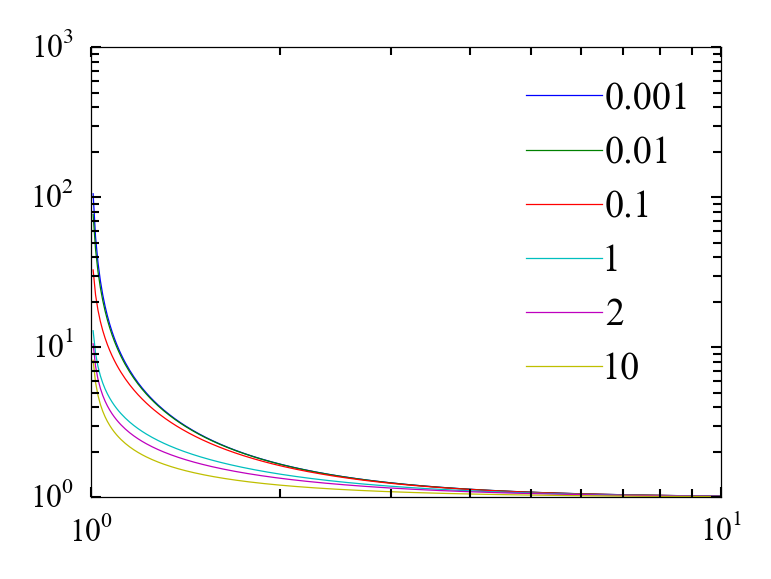

In [5]:
for y in yy:
    plt.loglog(x1, g(x1, y), label=str(y))
plt.legend(loc='best');

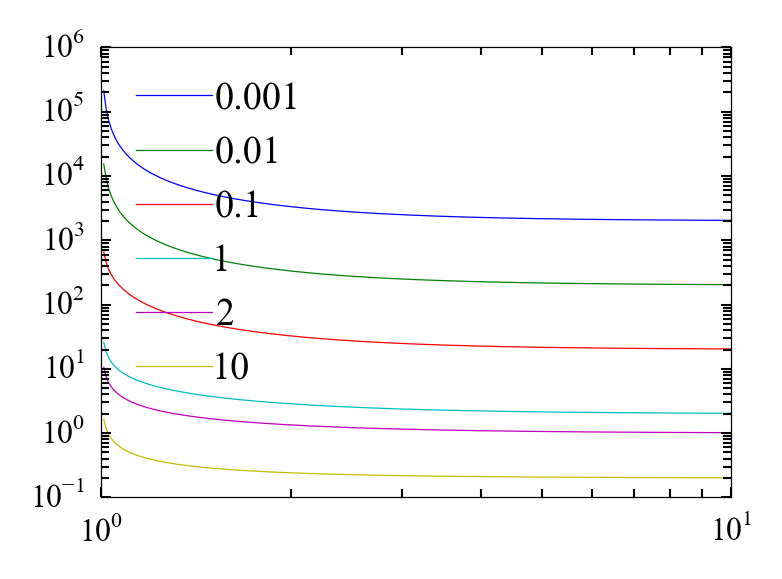

In [6]:
for y in yy:
    plt.loglog(x1, 2 / y * g(x1, y), label=str(y))
plt.legend(loc='best');

-c:3: RuntimeWarning: invalid value encountered in true_divide
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


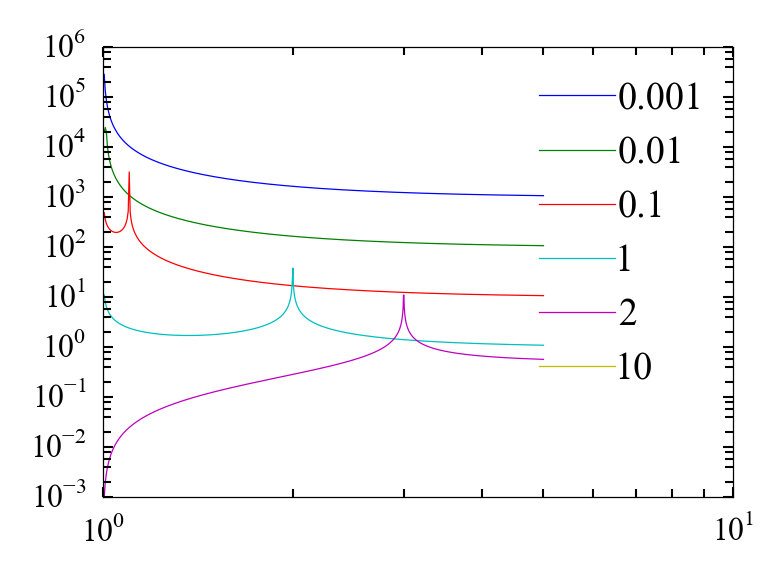

In [7]:
for y in yy:
    plt.loglog(-x3, 1 / y * g(x3, y), label=str(y))
plt.legend(loc='best');

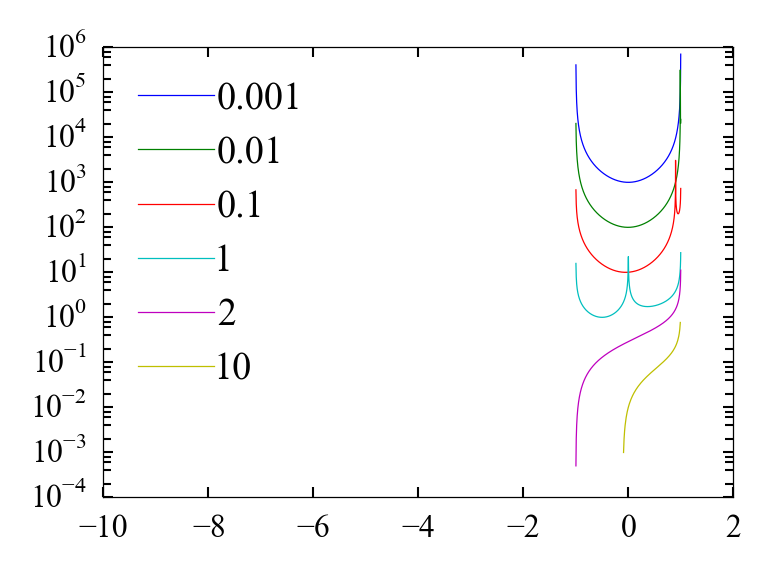

In [8]:
for y in yy:
    if y > 2:
        x = np.linspace(1-y, 1, 1e3)
    else:
        x = np.linspace(-1, 1, 1e3)
    plt.semilogy(x, 1 / y * g(x, y), label=str(y))
plt.legend(loc='best');

In [9]:
def FermiDirac(epsilon):
    return (np.exp(epsilon) + 1)**-1

Fix $T = T_c / 10$ so that
$$
\epsilon
  =
  \frac{E}{k_B T}
  =
  \frac{10 E}{k_B T_c}
  =
  \frac{10 E}{2 \Delta / 3.5}
  =
  \frac{17.5 E}{\Delta}.  
$$

# Approximate conductivity above the gap

For $f(E) = 0$, M-B give
$$
\frac{\sigma_1}{\sigma_n}
  =
  \left(1 + \frac{2 \Delta_0}{h \nu} \right) E(k)
  - 2 \left( \frac{2 \Delta_0}{h \nu} \right) K(k),
$$
valid for $h \nu > 2 \Delta_0$, and
$$
\frac{\sigma_2}{\sigma_n}
  =
  \frac{1}{2} \left( \frac{2 \Delta_0}{h \nu} + 1 \right) E(k')
  + \frac{1}{2} \left( \frac{2 \Delta_0}{h \nu} - 1 \right) K(k'),
$$
valid for all $\nu$. The arguments of the elliptic integrals $K(k)$, of the first kind, and $E(k)$, of the second kind, are
$$
k
  =
  \left| \frac{2 \Delta_0 - h \nu}{2 \Delta_0 + h \nu} \right| 
  =
  \left| 1 - \frac{2}{2 \Delta_0 / h \nu + 1} \right|,
$$
and
$$
k' = (1 - k^2)^{1/2}.
$$

In the dimensionless units used above, we have
\begin{align*}
\frac{\sigma_1}{\sigma_n}
  &=
  \left( 1 + \frac{2}{y} \right) E(k) - \frac{4}{y} K(k) \\
\frac{\sigma_2}{\sigma_n}
  &=
  \left( \frac{1}{y} + \frac{1}{2} \right) E(k') + \left( \frac{1}{y} - \frac{1}{2} \right) K(k'),
\end{align*}
with
$$
k
  =
  \left| 1 - \frac{2}{2/y + 1} \right|
$$
and $k'$ as above.


In [10]:
from scipy.special import ellipk, ellipe

In [11]:
y = np.linspace(2, 6, 1e3)
k = np.abs(1 - 2 / (2/y + 1))
kp = (1 - k**2)**(1/2)
# See the scipy documentation; the convention is different.
sigma_1 = (1 + 2 / y) * ellipe(k**2) - (4 / y) * ellipk(k**2)
sigma_2 = (1 / y + 1 / 2) * ellipe(kp**2) + (1 / y - 1 / 2) * ellipk(kp**2);

-c:6: RuntimeWarning: invalid value encountered in multiply


In [12]:
Tc = 1.39
nu_c = 74 * Tc # in GHz
nu = nu_c * y / 2

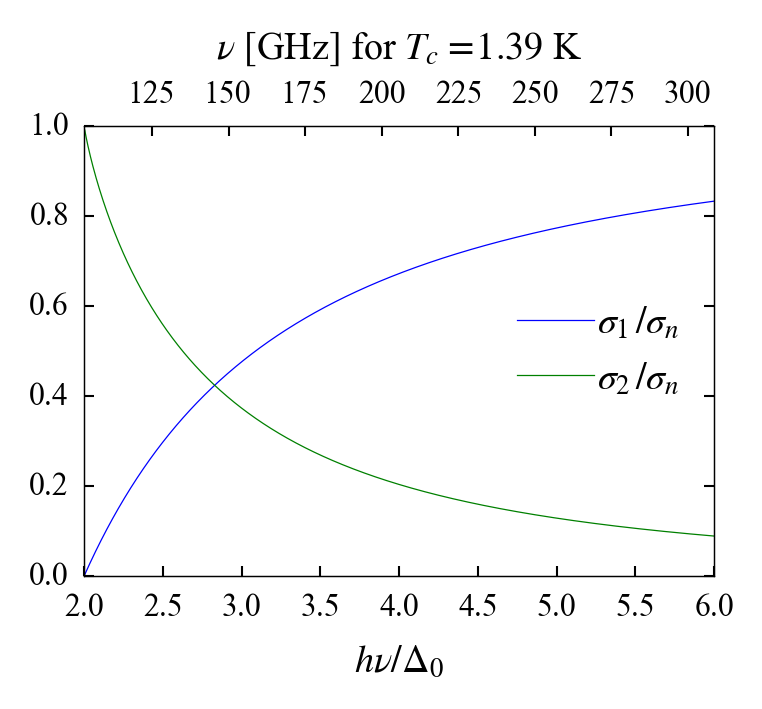

In [13]:
fig, ax = plt.subplots()
ax.plot(y, sigma_1, label=r'$\sigma_1 / \sigma_n$')
ax.plot(y, sigma_2, label=r'$\sigma_2 / \sigma_n$')
ax2 = ax.twiny()
ax2.plot(nu, sigma_1, alpha=0)
ax2.plot(nu, sigma_2, alpha=0)
ax2.set_xticks(range(125, 325, 25))
ax2.set_xlim(nu.min(), nu.max())
ax.legend(loc='best')
ax.set_xlabel(r'$h \nu / \Delta_0$')
ax2.set_xlabel(r'$\nu$ [GHz] for $T_c = 1.39$ K');